# Clustering untuk menganalisis distribusi data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import cluster

%matplotlib inline
sns.set()
plt.style.use('ggplot')

In [3]:
"import data"
df = pd.read_csv('G:/pintaria/Machine Learning/4. Clustering dengan K-Means/delivery_fleet.csv', delimiter='\t')
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
Driver_ID           4000 non-null int64
Distance_Feature    4000 non-null float64
Speeding_Feature    4000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 93.8 KB


Text(0,0.5,'speeding')

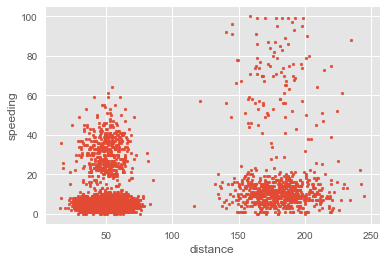

In [6]:
# getting values and plotting it
f1 = df.Distance_Feature.values
f2 = df.Speeding_Feature.values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, s=7)
plt.xlabel('distance')
plt.ylabel('speeding')

In [10]:
df_2_vars = df.drop(['Driver_ID'], axis=1)
data = df_2_vars.values
data

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [11]:
data.shape

(4000, 2)

# FLAT CLUSTERING DENGAN KMeans

In [20]:
# performing flat clustering with k = 2
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
labels = kmeans.predict(data)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [22]:
Centroids = kmeans.cluster_centers_
C_x = Centroids[:,0]
C_y = Centroids[:,1]

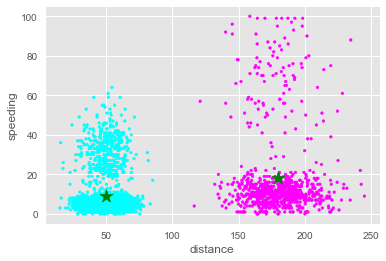

In [23]:
plt.xlabel('distance')
plt.ylabel('speeding')
plt.scatter(f1, f2, c=labels, s=7, cmap=plt.cm.cool)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

# Hierrarchical clustering dengan MeanShift

In [24]:
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import style

In [25]:
# generte sample data
centers = [[1,1],[5,5],[3,10]]
X, _ = make_blobs(n_samples=500, centers=centers, cluster_std=1)

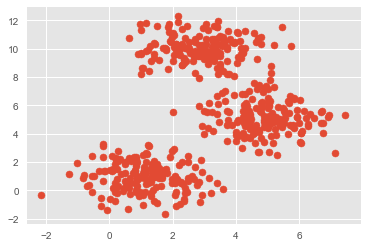

In [26]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [27]:
ms = MeanShift()
ms.fit(X)

cluster_centers = ms.cluster_centers_
cluster_centers

array([[ 4.8609778 ,  5.13189667],
       [ 1.1185183 ,  0.93248493],
       [ 2.84857639, 10.00684872]])

In [28]:
labels = ms.labels_
labels

array([0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1,
       2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0,
       1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1,
       1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0,
       1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 1, 0,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0,

In [29]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print('number of estimated clusters: ', n_clusters_)

[[ 4.8609778   5.13189667]
 [ 1.1185183   0.93248493]
 [ 2.84857639 10.00684872]]
number of estimated clusters:  3


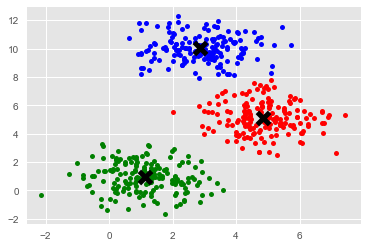

In [30]:
colors = 10*['r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
    
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
           marker='x', color='k', s=150, linewidth=5, zorder=10)
plt.show()

In [31]:
newms = MeanShift()
newms.fit(data)

cluster_centers = newms.cluster_centers_
cluster_centers

array([[ 50.03352564,   7.93141026],
       [179.3323839 ,  10.50309598],
       [176.62831461,  69.82022472]])

In [32]:
labels = newms.labels_
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [33]:
print(cluster_centers)
n_clusters = len(np.unique(labels))
print("number of estimated clusters: ", n_clusters)

[[ 50.03352564   7.93141026]
 [179.3323839   10.50309598]
 [176.62831461  69.82022472]]
number of estimated clusters:  3


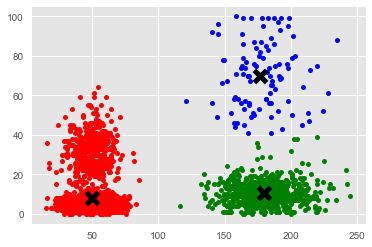

In [34]:
colors = 10*['r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.']
for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize=10)
    
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
           marker='x', color='k', s=150, linewidth=5, zorder=10)
plt.show()